In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import matplotlib.gridspec as gridspec
import pickle5
sys.path.append( "../../data_evaluation")
import handle_dictionaries
import spikeTrainAnalysis as sta
from scipy.interpolate import griddata

from scipy.optimize import curve_fit

# generate plot from preevaluated data

generate figure for first two panels

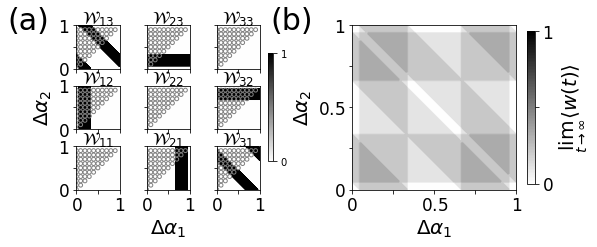

In [3]:
ticksFontsize = 13
labelFontsize = 15
ticksFontsize = 17
labelFontsize = 20

# spike trains
height = 0.09
gap_h=0.04
x1 = 0.05
x2 = x1+height
x3 = x2+gap_h
x4 = x3+height
x5 = x4+gap_h
x6 = x5+height

height = 0.2
gap_v=0.08
y1=0.05
y2=y1+height
y3=y2+gap_v
y4=y3+height
y5=y4+gap_v
y6=y5+height

# specify parameter set
parameters = {}
# parameters[ 'seed' ] = 10
# parameters[ 'ppb' ] = 3
# parameters[ 'fCR' ] = 5.0 # Hz
# parameters[ 'f_intra' ] = 120.0 # Hz
# parameters[ 'M' ] = 3
# parameters[ 'de' ] = 1.0
# parameters[ 'Astim' ] = 0.8
parameters[ 'seed' ] = 10
parameters[ 'ppb' ] = 1
parameters[ 'fCR' ] = 10.0 # Hz
parameters[ 'f_intra' ] = 120.0 # Hz
parameters[ 'M' ] = 3
parameters[ 'de' ] = 1.0
parameters[ 'Astim' ] = 0.4

## dictionary theory
if parameters[ 'ppb' ] == 1:
    filename_dic_theory = 'data/dic_output_network_structure_seed_'+str(parameters[ 'seed' ])+'_ppb_'+str(parameters[ 'ppb' ])+'_fCR_'+str(parameters[ 'fCR' ])+'_M_'+str(parameters[ 'M' ])+'_de_'+str(parameters[ 'de' ])+'_Astim_'+str(parameters[ 'Astim' ])
else:
    filename_dic_theory = 'data/dic_output_network_structure_seed_'+str(parameters[ 'seed' ])+'_ppb_'+str(parameters[ 'ppb' ])+'_fCR_'+str(parameters[ 'fCR' ])+'_M_'+str(parameters[ 'M' ])+'_de_'+str(parameters[ 'de' ])+'_Astim_'+str(parameters[ 'Astim' ])+'_fintra_'+str(parameters[ 'f_intra' ])
dic_theory = handle_dictionaries.dic_load( filename_dic_theory )




# set grid spec
gs_20 = gridspec.GridSpec(1, 1)
gs_20.update(top=y6, bottom=y5, left=x1, right=x2)

# set grid spec
gs_21 = gridspec.GridSpec(1, 1)
gs_21.update(top=y6, bottom=y5, left=x3, right=x4)

# set grid spec
gs_22 = gridspec.GridSpec(1, 1)
gs_22.update(top=y6, bottom=y5, left=x5, right=x6)

# set grid spec
gs_10 = gridspec.GridSpec(1, 1)
gs_10.update(top=y4, bottom=y3, left=x1, right=x2)

# set grid spec
gs_11 = gridspec.GridSpec(1, 1)
gs_11.update(top=y4, bottom=y3, left=x3, right=x4)

# set grid spec
gs_12 = gridspec.GridSpec(1, 1)
gs_12.update(top=y4, bottom=y3, left=x5, right=x6)

# set grid spec
gs_00 = gridspec.GridSpec(1, 1)
gs_00.update(top=y2, bottom=y1, left=x1, right=x2)

# set grid spec
gs_01 = gridspec.GridSpec(1, 1)
gs_01.update(top=y2, bottom=y1, left=x3, right=x4)

# set grid spec
gs_02 = gridspec.GridSpec(1, 1)
gs_02.update(top=y2, bottom=y1, left=x5, right=x6)


# set grid spec
gs_total = gridspec.GridSpec(1, 1)
gs_total.update(top=y6, bottom=y1, left=0.55, right=0.95)

leftCBar = x6+0.01
rightCBar=x6+0.02

gs_colorbar =  gridspec.GridSpec(1, 1)
gs_colorbar.update(top=y6, bottom=y1, left=leftCBar, right=rightCBar )


### generate figure
fig = plt.figure( figsize = (7.5,3) )

# top row
ax_20 = fig.add_subplot( gs_20[0,0] )
cax_20=ax_20.contourf(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , dic_theory['block']['02'], levels=np.linspace(0,1,100), cmap='gray_r', vmin=0, vmax=1 )
ax_20.set_aspect(1)

ax_20.set_yticks([0,0.5,1])
ax_20.set_yticklabels(['$0$','','$1$'], fontsize=ticksFontsize)
ax_20.set_xticks([0,0.5,1])
ax_20.set_xticklabels(['','',''], fontsize=ticksFontsize)


ax_21 = fig.add_subplot( gs_21[0,0] )
cax_21=ax_21.contourf(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , dic_theory['block']['12'], levels=np.linspace(0,1,100), cmap='gray_r', vmin=0, vmax=1 )
ax_21.set_aspect(1)

ax_21.set_yticks([0,0.5,1])
ax_21.set_yticklabels(['','',''], fontsize=ticksFontsize)
ax_21.set_xticks([0,0.5,1])
ax_21.set_xticklabels(['','',''], fontsize=ticksFontsize)

ax_22 = fig.add_subplot( gs_22[0,0] )
cax_22=ax_22.contourf(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , dic_theory['block']['22'], levels=np.linspace(0,1,100), cmap='gray_r', vmin=0, vmax=1 )
ax_22.set_aspect(1)

ax_22.set_yticks([0,0.5,1])
ax_22.set_yticklabels(['','',''], fontsize=ticksFontsize)
ax_22.set_xticks([0,0.5,1])
ax_22.set_xticklabels(['','',''], fontsize=ticksFontsize)


# center
ax_10 = fig.add_subplot( gs_10[0,0] )
cax_10=ax_10.contourf(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , dic_theory['block']['01'], levels=np.linspace(0,1,100), cmap='gray_r', vmin=0, vmax=1 )
ax_10.set_aspect(1)

ax_10.set_yticks([0,0.5,1])
ax_10.set_yticklabels(['$0$','','$1$'], fontsize=ticksFontsize)
ax_10.set_xticks([0,0.5,1])
ax_10.set_xticklabels(['','',''], fontsize=ticksFontsize)


ax_11 = fig.add_subplot( gs_11[0,0] )
cax_11=ax_11.contourf(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , dic_theory['block']['11'], levels=np.linspace(0,1,100), cmap='gray_r', vmin=0, vmax=1 )
ax_11.set_aspect(1)

ax_11.set_yticks([0,0.5,1])
ax_11.set_yticklabels(['','',''], fontsize=ticksFontsize)
ax_11.set_xticks([0,0.5,1])
ax_11.set_xticklabels(['','',''], fontsize=ticksFontsize)


ax_12 = fig.add_subplot( gs_12[0,0] )
cax_12=ax_12.contourf(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , dic_theory['block']['21'], levels=np.linspace(0,1,100), cmap='gray_r', vmin=0, vmax=1 )
ax_12.set_aspect(1)

ax_12.set_yticks([0,0.5,1])
ax_12.set_yticklabels(['','',''], fontsize=ticksFontsize)
ax_12.set_xticks([0,0.5,1])
ax_12.set_xticklabels(['','',''], fontsize=ticksFontsize)




# bottom
ax_00 = fig.add_subplot( gs_00[0,0] )
cax_00=ax_00.contourf(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , dic_theory['block']['00'], levels=np.linspace(0,1,100), cmap='gray_r', vmin=0, vmax=1 )
ax_00.set_aspect(1)

ax_00.set_yticks([0,0.5,1])
ax_00.set_yticklabels(['$0$','','$1$'], fontsize=ticksFontsize)
ax_00.set_xticks([0,0.5,1])
ax_00.set_xticklabels(['$0$','','$1$'], fontsize=ticksFontsize)


ax_01 = fig.add_subplot( gs_01[0,0] )
cax_01=ax_01.contourf(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , dic_theory['block']['10'], levels=np.linspace(0,1,100), cmap='gray_r', vmin=0, vmax=1 )
ax_01.set_aspect(1)

ax_01.set_yticks([0,0.5,1])
ax_01.set_yticklabels(['','',''], fontsize=ticksFontsize)
ax_01.set_xticks([0,0.5,1])
ax_01.set_xticklabels(['$0$','','$1$'], fontsize=ticksFontsize)


ax_02 = fig.add_subplot( gs_02[0,0] )
cax_02=ax_02.contourf(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , dic_theory['block']['20'], levels=np.linspace(0,1,100), cmap='gray_r', vmin=0, vmax=1 )
ax_02.set_aspect(1)

ax_02.set_yticks([0,0.5,1])
ax_02.set_yticklabels(['','',''], fontsize=ticksFontsize)
ax_02.set_xticks([0,0.5,1])
ax_02.set_xticklabels(['$0$','','$1$'], fontsize=ticksFontsize)

# ax.contour(  Dalpha1_2D , Dalpha2_2D , np.log(Score_2D+1), levels=np.linspace(-0.1,5,200), colors="black", linewidths=1, vmin=0, vmax=5 )
# #ax.imshow( np.log(Score_2D+1), cmap='gist_ncar_r', vmin=0, vmax=5, origin='lower' )
# #ax.contour(  Dalpha1_2D , Dalpha2_2D , Score_2D, levels=64, colors="black", linewidths=1, vmin=0, vmax=56 )

# plt.colorbar( cax, ticks=[0,1,2,3,4,5,6,7,8,9] )
# ax.set_aspect(1)


ax_total = fig.add_subplot( gs_total[0,0] )

total = dic_theory['block']['00']+dic_theory['block']['01']+dic_theory['block']['02']+dic_theory['block']['10']+dic_theory['block']['11']+dic_theory['block']['12']+dic_theory['block']['20']+dic_theory['block']['21']+dic_theory['block']['22']

totalWmax = 1
cax = ax_total.contourf(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , total/float(9), levels=np.linspace(0,totalWmax,100), cmap='gray_r', vmin=0, vmax=totalWmax )
#cbar = plt.colorbar( cax , ticks = [0,1,2,3,4,5,6,7,8,9] , shrink = 0.93 )
#cbar.ax.set_yticklabels( ['$0$', '', '', '$3$', '', '', '$6$', '', '', '$9$'] , fontsize= ticksFontsize )
# cbar.set_label( '$\\sum \\mathcal{W}_{xy}$' , fontsize=labelFontsize)    
  
cbar = plt.colorbar( cax , ticks = [0,0.5,1] , shrink = 0.93 )
cbar.ax.set_yticklabels( ['$0$', '', '$1$'] , fontsize= ticksFontsize )
cbar.set_label( r'$\lim_{t \rightarrow \infty}\langle w(t) \rangle$' , fontsize=labelFontsize)    
    
# # plot contour lines
# color_20 = 'red'
# ax_20.contour(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , comp_20, levels=[0.5], vmin=0, vmax=1, colors=color_20 )
# ax_total.contour(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , comp_20, levels=[0.5], vmin=0, vmax=1, colors=color_20 )

# color_21 = 'orange'
# ax_21.contour(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , comp_21, levels=[0.5], vmin=0, vmax=1, colors=color_21 )
# ax_total.contour(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , comp_21, levels=[0.5], vmin=0, vmax=1, colors=color_21 )

# color_10 = 'green'
# ax_10.contour(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , comp_10, levels=[0.5], vmin=0, vmax=1, colors=color_10 )
# ax_total.contour(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , comp_10, levels=[0.5], vmin=0, vmax=1, colors=color_10 )

# color_12 = 'blue'
# ax_12.contour(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , comp_12, levels=[0.5], vmin=0, vmax=1, colors=color_12 )
# ax_total.contour(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , comp_12, levels=[0.5], vmin=0, vmax=1, colors=color_12 )

# color_01 = 'gray'
# ax_01.contour(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , comp_01, levels=[0.5], vmin=0, vmax=1, colors=color_01 )
# ax_total.contour(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , comp_01, levels=[0.5], vmin=0, vmax=1, colors=color_01 )

# color_02 = 'pink'
# ax_02.contour(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , comp_02, levels=[0.5], vmin=0, vmax=1, colors=color_02 )
# ax_total.contour(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , comp_02, levels=[0.5], vmin=0, vmax=1, colors=color_02 )


### load preevaluated simulation results
if parameters[ 'ppb' ] == 1:
    filename_simData = 'data/dic_simData_network_structure_seed_'+str(parameters[ 'seed' ])+'_ppb_'+str(parameters[ 'ppb' ])+'_fCR_'+str(parameters[ 'fCR' ])+'_M_'+str(parameters[ 'M' ])+'_de_'+str(parameters[ 'de' ])+'_Astim_'+str(parameters[ 'Astim' ])
else:
    filename_simData = 'data/dic_simData_network_structure_seed_'+str(parameters[ 'seed' ])+'_ppb_'+str(parameters[ 'ppb' ])+'_fCR_'+str(parameters[ 'fCR' ])+'_M_'+str(parameters[ 'M' ])+'_de_'+str(parameters[ 'de' ])+'_Astim_'+str(parameters[ 'Astim' ])+'_fintra_'+str(parameters[ 'f_intra' ])

dict_simData = handle_dictionaries.dic_load( filename_simData )

## simulation results
edgecolor='gray'
size = 15

# plot simulation data
block = '20'
ax_20.scatter( dict_simData['results'][block]['Dalpha1'], dict_simData['results'][block]['Dalpha2'], c=dict_simData['results'][block]['mBlockStrength'], s = size, edgecolor = edgecolor, vmin=0, vmax=1, cmap='gray_r')

block = '10'
ax_10.scatter( dict_simData['results'][block]['Dalpha1'], dict_simData['results'][block]['Dalpha2'], c=dict_simData['results'][block]['mBlockStrength'], s = size, edgecolor = edgecolor, vmin=0, vmax=1, cmap='gray_r')

block = '00'
ax_00.scatter( dict_simData['results'][block]['Dalpha1'], dict_simData['results'][block]['Dalpha2'], c=dict_simData['results'][block]['mBlockStrength'], s = size, edgecolor = edgecolor, vmin=0, vmax=1, cmap='gray_r')

# plot simulation data
block = '21'
ax_21.scatter( dict_simData['results'][block]['Dalpha1'], dict_simData['results'][block]['Dalpha2'], c=dict_simData['results'][block]['mBlockStrength'], s = size, edgecolor = edgecolor, vmin=0, vmax=1, cmap='gray_r')

block = '11'
ax_11.scatter( dict_simData['results'][block]['Dalpha1'], dict_simData['results'][block]['Dalpha2'], c=dict_simData['results'][block]['mBlockStrength'], s = size, edgecolor = edgecolor, vmin=0, vmax=1, cmap='gray_r')

block = '01'
ax_01.scatter( dict_simData['results'][block]['Dalpha1'], dict_simData['results'][block]['Dalpha2'], c=dict_simData['results'][block]['mBlockStrength'], s = size, edgecolor = edgecolor, vmin=0, vmax=1, cmap='gray_r')

# plot simulation data
block = '22'
ax_22.scatter( dict_simData['results'][block]['Dalpha1'], dict_simData['results'][block]['Dalpha2'], c=dict_simData['results'][block]['mBlockStrength'], s = size, edgecolor = edgecolor, vmin=0, vmax=1, cmap='gray_r')

block = '12'
ax_12.scatter( dict_simData['results'][block]['Dalpha1'], dict_simData['results'][block]['Dalpha2'], c=dict_simData['results'][block]['mBlockStrength'], s = size, edgecolor = edgecolor, vmin=0, vmax=1, cmap='gray_r')

block = '02'
ax_02.scatter( dict_simData['results'][block]['Dalpha1'], dict_simData['results'][block]['Dalpha2'], c=dict_simData['results'][block]['mBlockStrength'], s = size, edgecolor = edgecolor, vmin=0, vmax=1, cmap='gray_r')



ax_total.set_aspect(1)

ax_total.set_yticks([0,0.25,0.5,0.75,1])
ax_total.set_yticklabels(['$0$','','$0.5$','','$1$'], fontsize=ticksFontsize)
ax_total.set_xticks([0,0.25,0.5,0.75,1])
ax_total.set_xticklabels(['$0$','','$0.5$','','$1$'], fontsize=ticksFontsize)

ax_total.set_xlabel('$\Delta \\alpha_1$', fontsize=labelFontsize)
ax_total.set_ylabel('$\Delta \\alpha_2$', fontsize=labelFontsize)

# ax_02.text(0.2,0.1,'$\\mathcal{W}_{02}$', fontsize=labelFontsize, color='black')
# ax_01.text(0.4,0.1,'$\\mathcal{W}_{01}$', fontsize=labelFontsize, color='black')
# ax_00.text(0.2,0.1,'$\\mathcal{W}_{00}$', fontsize=labelFontsize, color='black')

# ax_12.text(0.2,0.1,'$\\mathcal{W}_{12}$', fontsize=labelFontsize, color='white')
# ax_11.text(0.2,0.1,'$\\mathcal{W}_{11}$', fontsize=labelFontsize, color='black')
# ax_10.text(0.05,0.1,'$\\mathcal{W}_{10}$', fontsize=labelFontsize, color='black')

# ax_22.text(0.2,0.71,'$\\mathcal{W}_{22}$', fontsize=labelFontsize, color='black')
# ax_21.text(0.2,0.71,'$\\mathcal{W}_{21}$', fontsize=labelFontsize, color='white')
# ax_20.text(0.22,0.71,'$\\mathcal{W}_{20}$', fontsize=labelFontsize, color='black')

ypad=0.93
ax_22.set_title('$\\mathcal{W}_{33}$', fontsize=ticksFontsize, color='black', y=ypad )
ax_21.set_title('$\\mathcal{W}_{23}$', fontsize=ticksFontsize, color='black', y=ypad )
ax_20.set_title('$\\mathcal{W}_{13}$', fontsize=ticksFontsize, color='black', y=ypad )

ax_12.set_title('$\\mathcal{W}_{32}$', fontsize=ticksFontsize, color='black', y=ypad )
ax_11.set_title('$\\mathcal{W}_{22}$', fontsize=ticksFontsize, color='black', y=ypad )
ax_10.set_title('$\\mathcal{W}_{12}$', fontsize=ticksFontsize, color='black', y=ypad )

ax_02.set_title('$\\mathcal{W}_{31}$', fontsize=ticksFontsize, color='black', y=ypad )
ax_01.set_title('$\\mathcal{W}_{21}$', fontsize=ticksFontsize, color='black', y=ypad )
ax_00.set_title('$\\mathcal{W}_{11}$', fontsize=ticksFontsize, color='black', y=ypad)


ax_10.set_ylabel('$\Delta \\alpha_2$', fontsize=labelFontsize)
ax_01.set_xlabel('$\Delta \\alpha_1$', fontsize=labelFontsize)

ax_20.text(-1.6,0.9,'(a)', fontsize=1.5*labelFontsize)
ax_20.text(4.5,0.9,'(b)', fontsize=1.5*labelFontsize)
# ax_20.text(-1.6,0.9,'(c)', fontsize=1.5*labelFontsize)
# ax_20.text(4.5,0.9,'(d)', fontsize=1.5*labelFontsize)

### plot colorbar 
ax_colorbar = fig.add_subplot( gs_colorbar[0,0] )
plt.colorbar(cax_20, ax=ax_colorbar, ticks=[0,1],fraction=1 ) #,shrink=2 )
ax_colorbar.set_axis_off()

# plt.savefig('Fig5a.svg', bbox_inches='tight')
# plt.savefig('Fig5a.png', bbox_inches='tight', dpi=300)
# plt.savefig('Fig5a.pdf', bbox_inches='tight')
# plt.savefig('Fig5a.eps', bbox_inches='tight')

generate figure for bottom two panels

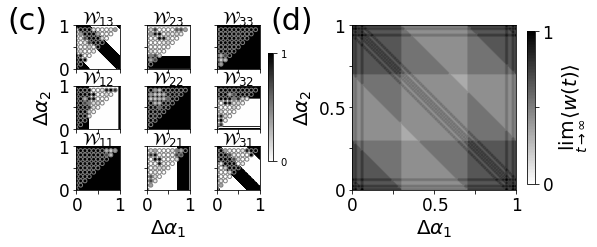

In [4]:
ticksFontsize = 13
labelFontsize = 15
ticksFontsize = 17
labelFontsize = 20

# spike trains
height = 0.09
gap_h=0.04
x1 = 0.05
x2 = x1+height
x3 = x2+gap_h
x4 = x3+height
x5 = x4+gap_h
x6 = x5+height

height = 0.2
gap_v=0.08
y1=0.05
y2=y1+height
y3=y2+gap_v
y4=y3+height
y5=y4+gap_v
y6=y5+height

# specify parameter set
parameters = {}
parameters[ 'seed' ] = 10
parameters[ 'ppb' ] = 3
parameters[ 'fCR' ] = 5.0 # Hz
parameters[ 'f_intra' ] = 120.0 # Hz
parameters[ 'M' ] = 3
parameters[ 'de' ] = 1.0
parameters[ 'Astim' ] = 0.8
# parameters[ 'seed' ] = 10
# parameters[ 'ppb' ] = 1
# parameters[ 'fCR' ] = 10.0 # Hz
# parameters[ 'f_intra' ] = 120.0 # Hz
# parameters[ 'M' ] = 3
# parameters[ 'de' ] = 1.0
# parameters[ 'Astim' ] = 0.4

## dictionary theory
if parameters[ 'ppb' ] == 1:
    filename_dic_theory = 'data/dic_output_network_structure_seed_'+str(parameters[ 'seed' ])+'_ppb_'+str(parameters[ 'ppb' ])+'_fCR_'+str(parameters[ 'fCR' ])+'_M_'+str(parameters[ 'M' ])+'_de_'+str(parameters[ 'de' ])+'_Astim_'+str(parameters[ 'Astim' ])
else:
    filename_dic_theory = 'data/dic_output_network_structure_seed_'+str(parameters[ 'seed' ])+'_ppb_'+str(parameters[ 'ppb' ])+'_fCR_'+str(parameters[ 'fCR' ])+'_M_'+str(parameters[ 'M' ])+'_de_'+str(parameters[ 'de' ])+'_Astim_'+str(parameters[ 'Astim' ])+'_fintra_'+str(parameters[ 'f_intra' ])
dic_theory = handle_dictionaries.dic_load( filename_dic_theory )




# set grid spec
gs_20 = gridspec.GridSpec(1, 1)
gs_20.update(top=y6, bottom=y5, left=x1, right=x2)

# set grid spec
gs_21 = gridspec.GridSpec(1, 1)
gs_21.update(top=y6, bottom=y5, left=x3, right=x4)

# set grid spec
gs_22 = gridspec.GridSpec(1, 1)
gs_22.update(top=y6, bottom=y5, left=x5, right=x6)

# set grid spec
gs_10 = gridspec.GridSpec(1, 1)
gs_10.update(top=y4, bottom=y3, left=x1, right=x2)

# set grid spec
gs_11 = gridspec.GridSpec(1, 1)
gs_11.update(top=y4, bottom=y3, left=x3, right=x4)

# set grid spec
gs_12 = gridspec.GridSpec(1, 1)
gs_12.update(top=y4, bottom=y3, left=x5, right=x6)

# set grid spec
gs_00 = gridspec.GridSpec(1, 1)
gs_00.update(top=y2, bottom=y1, left=x1, right=x2)

# set grid spec
gs_01 = gridspec.GridSpec(1, 1)
gs_01.update(top=y2, bottom=y1, left=x3, right=x4)

# set grid spec
gs_02 = gridspec.GridSpec(1, 1)
gs_02.update(top=y2, bottom=y1, left=x5, right=x6)


# set grid spec
gs_total = gridspec.GridSpec(1, 1)
gs_total.update(top=y6, bottom=y1, left=0.55, right=0.95)

leftCBar = x6+0.01
rightCBar=x6+0.02

gs_colorbar =  gridspec.GridSpec(1, 1)
gs_colorbar.update(top=y6, bottom=y1, left=leftCBar, right=rightCBar )


### generate figure
fig = plt.figure( figsize = (7.5,3) )

# top row
ax_20 = fig.add_subplot( gs_20[0,0] )
cax_20=ax_20.contourf(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , dic_theory['block']['02'], levels=np.linspace(0,1,100), cmap='gray_r', vmin=0, vmax=1 )
ax_20.set_aspect(1)

ax_20.set_yticks([0,0.5,1])
ax_20.set_yticklabels(['$0$','','$1$'], fontsize=ticksFontsize)
ax_20.set_xticks([0,0.5,1])
ax_20.set_xticklabels(['','',''], fontsize=ticksFontsize)


ax_21 = fig.add_subplot( gs_21[0,0] )
cax_21=ax_21.contourf(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , dic_theory['block']['12'], levels=np.linspace(0,1,100), cmap='gray_r', vmin=0, vmax=1 )
ax_21.set_aspect(1)

ax_21.set_yticks([0,0.5,1])
ax_21.set_yticklabels(['','',''], fontsize=ticksFontsize)
ax_21.set_xticks([0,0.5,1])
ax_21.set_xticklabels(['','',''], fontsize=ticksFontsize)

ax_22 = fig.add_subplot( gs_22[0,0] )
cax_22=ax_22.contourf(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , dic_theory['block']['22'], levels=np.linspace(0,1,100), cmap='gray_r', vmin=0, vmax=1 )
ax_22.set_aspect(1)

ax_22.set_yticks([0,0.5,1])
ax_22.set_yticklabels(['','',''], fontsize=ticksFontsize)
ax_22.set_xticks([0,0.5,1])
ax_22.set_xticklabels(['','',''], fontsize=ticksFontsize)


# center
ax_10 = fig.add_subplot( gs_10[0,0] )
cax_10=ax_10.contourf(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , dic_theory['block']['01'], levels=np.linspace(0,1,100), cmap='gray_r', vmin=0, vmax=1 )
ax_10.set_aspect(1)

ax_10.set_yticks([0,0.5,1])
ax_10.set_yticklabels(['$0$','','$1$'], fontsize=ticksFontsize)
ax_10.set_xticks([0,0.5,1])
ax_10.set_xticklabels(['','',''], fontsize=ticksFontsize)


ax_11 = fig.add_subplot( gs_11[0,0] )
cax_11=ax_11.contourf(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , dic_theory['block']['11'], levels=np.linspace(0,1,100), cmap='gray_r', vmin=0, vmax=1 )
ax_11.set_aspect(1)

ax_11.set_yticks([0,0.5,1])
ax_11.set_yticklabels(['','',''], fontsize=ticksFontsize)
ax_11.set_xticks([0,0.5,1])
ax_11.set_xticklabels(['','',''], fontsize=ticksFontsize)


ax_12 = fig.add_subplot( gs_12[0,0] )
cax_12=ax_12.contourf(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , dic_theory['block']['21'], levels=np.linspace(0,1,100), cmap='gray_r', vmin=0, vmax=1 )
ax_12.set_aspect(1)

ax_12.set_yticks([0,0.5,1])
ax_12.set_yticklabels(['','',''], fontsize=ticksFontsize)
ax_12.set_xticks([0,0.5,1])
ax_12.set_xticklabels(['','',''], fontsize=ticksFontsize)




# bottom
ax_00 = fig.add_subplot( gs_00[0,0] )
cax_00=ax_00.contourf(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , dic_theory['block']['00'], levels=np.linspace(0,1,100), cmap='gray_r', vmin=0, vmax=1 )
ax_00.set_aspect(1)

ax_00.set_yticks([0,0.5,1])
ax_00.set_yticklabels(['$0$','','$1$'], fontsize=ticksFontsize)
ax_00.set_xticks([0,0.5,1])
ax_00.set_xticklabels(['$0$','','$1$'], fontsize=ticksFontsize)


ax_01 = fig.add_subplot( gs_01[0,0] )
cax_01=ax_01.contourf(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , dic_theory['block']['10'], levels=np.linspace(0,1,100), cmap='gray_r', vmin=0, vmax=1 )
ax_01.set_aspect(1)

ax_01.set_yticks([0,0.5,1])
ax_01.set_yticklabels(['','',''], fontsize=ticksFontsize)
ax_01.set_xticks([0,0.5,1])
ax_01.set_xticklabels(['$0$','','$1$'], fontsize=ticksFontsize)


ax_02 = fig.add_subplot( gs_02[0,0] )
cax_02=ax_02.contourf(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , dic_theory['block']['20'], levels=np.linspace(0,1,100), cmap='gray_r', vmin=0, vmax=1 )
ax_02.set_aspect(1)

ax_02.set_yticks([0,0.5,1])
ax_02.set_yticklabels(['','',''], fontsize=ticksFontsize)
ax_02.set_xticks([0,0.5,1])
ax_02.set_xticklabels(['$0$','','$1$'], fontsize=ticksFontsize)

# ax.contour(  Dalpha1_2D , Dalpha2_2D , np.log(Score_2D+1), levels=np.linspace(-0.1,5,200), colors="black", linewidths=1, vmin=0, vmax=5 )
# #ax.imshow( np.log(Score_2D+1), cmap='gist_ncar_r', vmin=0, vmax=5, origin='lower' )
# #ax.contour(  Dalpha1_2D , Dalpha2_2D , Score_2D, levels=64, colors="black", linewidths=1, vmin=0, vmax=56 )

# plt.colorbar( cax, ticks=[0,1,2,3,4,5,6,7,8,9] )
# ax.set_aspect(1)


ax_total = fig.add_subplot( gs_total[0,0] )

total = dic_theory['block']['00']+dic_theory['block']['01']+dic_theory['block']['02']+dic_theory['block']['10']+dic_theory['block']['11']+dic_theory['block']['12']+dic_theory['block']['20']+dic_theory['block']['21']+dic_theory['block']['22']

totalWmax = 1
cax = ax_total.contourf(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , total/float(9), levels=np.linspace(0,totalWmax,100), cmap='gray_r', vmin=0, vmax=totalWmax )
#cbar = plt.colorbar( cax , ticks = [0,1,2,3,4,5,6,7,8,9] , shrink = 0.93 )
#cbar.ax.set_yticklabels( ['$0$', '', '', '$3$', '', '', '$6$', '', '', '$9$'] , fontsize= ticksFontsize )
# cbar.set_label( '$\\sum \\mathcal{W}_{xy}$' , fontsize=labelFontsize)    
  
cbar = plt.colorbar( cax , ticks = [0,0.5,1] , shrink = 0.93 )
cbar.ax.set_yticklabels( ['$0$', '', '$1$'] , fontsize= ticksFontsize )
cbar.set_label( r'$\lim_{t \rightarrow \infty}\langle w(t) \rangle$' , fontsize=labelFontsize)    
    
# # plot contour lines
# color_20 = 'red'
# ax_20.contour(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , comp_20, levels=[0.5], vmin=0, vmax=1, colors=color_20 )
# ax_total.contour(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , comp_20, levels=[0.5], vmin=0, vmax=1, colors=color_20 )

# color_21 = 'orange'
# ax_21.contour(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , comp_21, levels=[0.5], vmin=0, vmax=1, colors=color_21 )
# ax_total.contour(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , comp_21, levels=[0.5], vmin=0, vmax=1, colors=color_21 )

# color_10 = 'green'
# ax_10.contour(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , comp_10, levels=[0.5], vmin=0, vmax=1, colors=color_10 )
# ax_total.contour(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , comp_10, levels=[0.5], vmin=0, vmax=1, colors=color_10 )

# color_12 = 'blue'
# ax_12.contour(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , comp_12, levels=[0.5], vmin=0, vmax=1, colors=color_12 )
# ax_total.contour(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , comp_12, levels=[0.5], vmin=0, vmax=1, colors=color_12 )

# color_01 = 'gray'
# ax_01.contour(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , comp_01, levels=[0.5], vmin=0, vmax=1, colors=color_01 )
# ax_total.contour(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , comp_01, levels=[0.5], vmin=0, vmax=1, colors=color_01 )

# color_02 = 'pink'
# ax_02.contour(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , comp_02, levels=[0.5], vmin=0, vmax=1, colors=color_02 )
# ax_total.contour(  dic_theory['Dalpha1_2D'] , dic_theory['Dalpha2_2D'] , comp_02, levels=[0.5], vmin=0, vmax=1, colors=color_02 )


### load preevaluated simulation results
if parameters[ 'ppb' ] == 1:
    filename_simData = 'data/dic_simData_network_structure_seed_'+str(parameters[ 'seed' ])+'_ppb_'+str(parameters[ 'ppb' ])+'_fCR_'+str(parameters[ 'fCR' ])+'_M_'+str(parameters[ 'M' ])+'_de_'+str(parameters[ 'de' ])+'_Astim_'+str(parameters[ 'Astim' ])
else:
    filename_simData = 'data/dic_simData_network_structure_seed_'+str(parameters[ 'seed' ])+'_ppb_'+str(parameters[ 'ppb' ])+'_fCR_'+str(parameters[ 'fCR' ])+'_M_'+str(parameters[ 'M' ])+'_de_'+str(parameters[ 'de' ])+'_Astim_'+str(parameters[ 'Astim' ])+'_fintra_'+str(parameters[ 'f_intra' ])

dict_simData = handle_dictionaries.dic_load( filename_simData )

## simulation results
edgecolor='gray'
size = 15

# plot simulation data
block = '20'
ax_20.scatter( dict_simData['results'][block]['Dalpha1'], dict_simData['results'][block]['Dalpha2'], c=dict_simData['results'][block]['mBlockStrength'], s = size, edgecolor = edgecolor, vmin=0, vmax=1, cmap='gray_r')

block = '10'
ax_10.scatter( dict_simData['results'][block]['Dalpha1'], dict_simData['results'][block]['Dalpha2'], c=dict_simData['results'][block]['mBlockStrength'], s = size, edgecolor = edgecolor, vmin=0, vmax=1, cmap='gray_r')

block = '00'
ax_00.scatter( dict_simData['results'][block]['Dalpha1'], dict_simData['results'][block]['Dalpha2'], c=dict_simData['results'][block]['mBlockStrength'], s = size, edgecolor = edgecolor, vmin=0, vmax=1, cmap='gray_r')

# plot simulation data
block = '21'
ax_21.scatter( dict_simData['results'][block]['Dalpha1'], dict_simData['results'][block]['Dalpha2'], c=dict_simData['results'][block]['mBlockStrength'], s = size, edgecolor = edgecolor, vmin=0, vmax=1, cmap='gray_r')

block = '11'
ax_11.scatter( dict_simData['results'][block]['Dalpha1'], dict_simData['results'][block]['Dalpha2'], c=dict_simData['results'][block]['mBlockStrength'], s = size, edgecolor = edgecolor, vmin=0, vmax=1, cmap='gray_r')

block = '01'
ax_01.scatter( dict_simData['results'][block]['Dalpha1'], dict_simData['results'][block]['Dalpha2'], c=dict_simData['results'][block]['mBlockStrength'], s = size, edgecolor = edgecolor, vmin=0, vmax=1, cmap='gray_r')

# plot simulation data
block = '22'
ax_22.scatter( dict_simData['results'][block]['Dalpha1'], dict_simData['results'][block]['Dalpha2'], c=dict_simData['results'][block]['mBlockStrength'], s = size, edgecolor = edgecolor, vmin=0, vmax=1, cmap='gray_r')

block = '12'
ax_12.scatter( dict_simData['results'][block]['Dalpha1'], dict_simData['results'][block]['Dalpha2'], c=dict_simData['results'][block]['mBlockStrength'], s = size, edgecolor = edgecolor, vmin=0, vmax=1, cmap='gray_r')

block = '02'
ax_02.scatter( dict_simData['results'][block]['Dalpha1'], dict_simData['results'][block]['Dalpha2'], c=dict_simData['results'][block]['mBlockStrength'], s = size, edgecolor = edgecolor, vmin=0, vmax=1, cmap='gray_r')



ax_total.set_aspect(1)

ax_total.set_yticks([0,0.25,0.5,0.75,1])
ax_total.set_yticklabels(['$0$','','$0.5$','','$1$'], fontsize=ticksFontsize)
ax_total.set_xticks([0,0.25,0.5,0.75,1])
ax_total.set_xticklabels(['$0$','','$0.5$','','$1$'], fontsize=ticksFontsize)

ax_total.set_xlabel('$\Delta \\alpha_1$', fontsize=labelFontsize)
ax_total.set_ylabel('$\Delta \\alpha_2$', fontsize=labelFontsize)

# ax_02.text(0.2,0.1,'$\\mathcal{W}_{02}$', fontsize=labelFontsize, color='black')
# ax_01.text(0.4,0.1,'$\\mathcal{W}_{01}$', fontsize=labelFontsize, color='black')
# ax_00.text(0.2,0.1,'$\\mathcal{W}_{00}$', fontsize=labelFontsize, color='black')

# ax_12.text(0.2,0.1,'$\\mathcal{W}_{12}$', fontsize=labelFontsize, color='white')
# ax_11.text(0.2,0.1,'$\\mathcal{W}_{11}$', fontsize=labelFontsize, color='black')
# ax_10.text(0.05,0.1,'$\\mathcal{W}_{10}$', fontsize=labelFontsize, color='black')

# ax_22.text(0.2,0.71,'$\\mathcal{W}_{22}$', fontsize=labelFontsize, color='black')
# ax_21.text(0.2,0.71,'$\\mathcal{W}_{21}$', fontsize=labelFontsize, color='white')
# ax_20.text(0.22,0.71,'$\\mathcal{W}_{20}$', fontsize=labelFontsize, color='black')

ypad=0.93
ax_22.set_title('$\\mathcal{W}_{33}$', fontsize=ticksFontsize, color='black', y=ypad )
ax_21.set_title('$\\mathcal{W}_{23}$', fontsize=ticksFontsize, color='black', y=ypad )
ax_20.set_title('$\\mathcal{W}_{13}$', fontsize=ticksFontsize, color='black', y=ypad )

ax_12.set_title('$\\mathcal{W}_{32}$', fontsize=ticksFontsize, color='black', y=ypad )
ax_11.set_title('$\\mathcal{W}_{22}$', fontsize=ticksFontsize, color='black', y=ypad )
ax_10.set_title('$\\mathcal{W}_{12}$', fontsize=ticksFontsize, color='black', y=ypad )

ax_02.set_title('$\\mathcal{W}_{31}$', fontsize=ticksFontsize, color='black', y=ypad )
ax_01.set_title('$\\mathcal{W}_{21}$', fontsize=ticksFontsize, color='black', y=ypad )
ax_00.set_title('$\\mathcal{W}_{11}$', fontsize=ticksFontsize, color='black', y=ypad)


ax_10.set_ylabel('$\Delta \\alpha_2$', fontsize=labelFontsize)
ax_01.set_xlabel('$\Delta \\alpha_1$', fontsize=labelFontsize)

# ax_20.text(-1.6,0.9,'(a)', fontsize=1.5*labelFontsize)
# ax_20.text(4.5,0.9,'(b)', fontsize=1.5*labelFontsize)
ax_20.text(-1.6,0.9,'(c)', fontsize=1.5*labelFontsize)
ax_20.text(4.5,0.9,'(d)', fontsize=1.5*labelFontsize)

### plot colorbar 
ax_colorbar = fig.add_subplot( gs_colorbar[0,0] )
plt.colorbar(cax_20, ax=ax_colorbar, ticks=[0,1],fraction=1 ) #,shrink=2 )
ax_colorbar.set_axis_off()

# plt.savefig('Fig5b.svg', bbox_inches='tight')
# plt.savefig('Fig5b.png', bbox_inches='tight', dpi=300)
# plt.savefig('Fig5b.pdf', bbox_inches='tight')
# plt.savefig('Fig5b.eps', bbox_inches='tight')

# functions

In [2]:
def get_simulation_results( parameters , teval ):
    
    seedArray = [10,12,14,16,18]
    
    # get filters for individual blocks
    N_subpop = int(1000/parameters[ 'M' ])
    filter_block_00 = np.zeros( (1002,1002) )
    filter_block_00[ :N_subpop, :N_subpop ] = np.ones( (N_subpop,N_subpop) )
    filter_block_00 = scipy.sparse.csc_matrix( filter_block_00 )    

    filter_block_01 = np.zeros( (1002,1002) )
    filter_block_01[ :N_subpop, N_subpop:2*N_subpop ] = np.ones( (N_subpop,N_subpop) )
    filter_block_01 = scipy.sparse.csc_matrix( filter_block_01 )

    filter_block_02 = np.zeros( (1002,1002) )
    filter_block_02[ :N_subpop, 2*N_subpop:3*N_subpop ] = np.ones( (N_subpop,N_subpop) )
    filter_block_02 = scipy.sparse.csc_matrix( filter_block_02 )
    
    filter_block_10 = np.zeros( (1002,1002) )
    filter_block_10[ N_subpop:2*N_subpop, :N_subpop ] = np.ones( (N_subpop,N_subpop) )
    filter_block_10 = scipy.sparse.csc_matrix( filter_block_10 )
    
    filter_block_11 = np.zeros( (1002,1002) )
    filter_block_11[ N_subpop:2*N_subpop, N_subpop:2*N_subpop ] = np.ones( (N_subpop,N_subpop) )
    filter_block_11 = scipy.sparse.csc_matrix( filter_block_11 )
    
    filter_block_12 = np.zeros( (1002,1002) )
    filter_block_12[ N_subpop:2*N_subpop, 2*N_subpop:3*N_subpop ] = np.ones( (N_subpop,N_subpop) )
    filter_block_12 = scipy.sparse.csc_matrix( filter_block_12 )
    
    filter_block_20 = np.zeros( (1002,1002) )
    filter_block_20[ 2*N_subpop:3*N_subpop, :N_subpop ] = np.ones( (N_subpop,N_subpop) )
    filter_block_20 = scipy.sparse.csc_matrix( filter_block_20 )
    
    filter_block_21 = np.zeros( (1002,1002) )
    filter_block_21[ 2*N_subpop:3*N_subpop, N_subpop:2*N_subpop ] = np.ones( (N_subpop,N_subpop) )
    filter_block_21 = scipy.sparse.csc_matrix( filter_block_21 )
    
    filter_block_22 = np.zeros( (1002,1002) )
    filter_block_22[ 2*N_subpop:3*N_subpop, 2*N_subpop:3*N_subpop ] = np.ones( (N_subpop,N_subpop) )
    filter_block_22 = scipy.sparse.csc_matrix( filter_block_22 )

    # phase lags
    DeltaAlpha1_values = np.round( np.arange( 0.0, 1.0, 0.1 ) , 1)
    DeltaAlpha2_values = np.round( np.arange( 0.0, 1.0, 0.1 ) , 1)

    # mean block strength
    results_00 = -1*np.ones( (len(DeltaAlpha1_values),len(DeltaAlpha2_values), len(seedArray)) )
    results_01 = -1*np.ones( (len(DeltaAlpha1_values),len(DeltaAlpha2_values), len(seedArray)) )
    results_02 = -1*np.ones( (len(DeltaAlpha1_values),len(DeltaAlpha2_values), len(seedArray)) )
    results_10 = -1*np.ones( (len(DeltaAlpha1_values),len(DeltaAlpha2_values), len(seedArray)) )
    results_11 = -1*np.ones( (len(DeltaAlpha1_values),len(DeltaAlpha2_values), len(seedArray)) )
    results_12 = -1*np.ones( (len(DeltaAlpha1_values),len(DeltaAlpha2_values), len(seedArray)) )
    results_20 = -1*np.ones( (len(DeltaAlpha1_values),len(DeltaAlpha2_values), len(seedArray)) )
    results_21 = -1*np.ones( (len(DeltaAlpha1_values),len(DeltaAlpha2_values), len(seedArray)) )
    results_22 = -1*np.ones( (len(DeltaAlpha1_values),len(DeltaAlpha2_values), len(seedArray)) )
    
    
    Dalpha1_2D = np.zeros( (len(DeltaAlpha1_values),len(DeltaAlpha2_values)) )
    Dalpha2_2D = np.zeros( (len(DeltaAlpha1_values),len(DeltaAlpha2_values)) )
    
    for kDalpha1 in range( len(DeltaAlpha1_values) ):
        Dalpha1 = DeltaAlpha1_values[ kDalpha1 ]
        for kDalpha2 in range( len(DeltaAlpha2_values) ):
            Dalpha2 = DeltaAlpha1_values[ kDalpha2 ] 
     
            print( Dalpha1 , Dalpha2 )
        
            # record phase lags
            Dalpha1_2D[kDalpha1,kDalpha2] = Dalpha1
            Dalpha2_2D[kDalpha1,kDalpha2] = Dalpha2

            for kseed in range(len(seedArray)):
                seed = seedArray[kseed]
                print(seed)
                if parameters[ 'ppb' ] == 1:
                    directory = '/Users/jkromer/Desktop/Projects/Stanford/scratch/Phase_shifted_periodic_multisite_stimulation/EL_phase_lags_TASS/initial_seed_'+str(seed)+'/electrical_stimulation/multiple_spikes_phase_shifted_periodic_multisite_stimulation_TASS2012/Dalpha1_'+str(Dalpha1)+'_Dalpha2_'+str(Dalpha2)+'/pulses_per_burst_'+str(parameters[ 'ppb' ])+'/fCR_'+str(parameters[ 'fCR' ])+'_M_'+str(parameters[ 'M' ])+'_e_pulse_scale_'+str(parameters[ 'de' ])+'/Astim_'+str(parameters[ 'Astim' ])+'_Tstim_1020.0/'+str(teval)+'_sec/'
                else:
                    directory = '/Users/jkromer/Desktop/Projects/Stanford/scratch/Phase_shifted_periodic_multisite_stimulation/EL_phase_lags_TASS/initial_seed_'+str(seed)+'/electrical_stimulation/multiple_spikes_phase_shifted_periodic_multisite_stimulation_TASS2012/Dalpha1_'+str(Dalpha1)+'_Dalpha2_'+str(Dalpha2)+'/pulses_per_burst_'+str(parameters[ 'ppb' ])+'/intraburst_frequency_'+str(parameters[ 'f_intra' ])+'_fCR_'+str(parameters[ 'fCR' ])+'_M_'+str(parameters[ 'M' ])+'_e_pulse_scale_'+str(parameters[ 'de' ])+'/Astim_'+str(parameters[ 'Astim' ])+'_Tstim_1020.0/'+str(teval)+'_sec/'
                # load data for synaptic weights
                filename_cMatrix = directory + 'cMatrix.npz'
                if os.path.isfile( filename_cMatrix ):
                    cMatrix = scipy.sparse.load_npz( filename_cMatrix )
                    
                    #print('cMatrix loaded')
                    filename_synCon = directory + 'synConnections.npz'
                    if os.path.isfile( filename_synCon ):
                        synCon = scipy.sparse.load_npz( filename_synCon )
                        #print(synCon)
                        #print('synCon loaded')
       
                        # block 00
                        currentBlock = filter_block_00.A
                        Nconnections_in_block = np.sum( np.multiply( synCon.A , currentBlock ) )
                        meanBlockStrength = np.sum( np.multiply( np.multiply( cMatrix.A , synCon.A ) , currentBlock ) )/float(Nconnections_in_block)
                        results_00[kDalpha1,kDalpha2,kseed] = meanBlockStrength
                        
                        # block 01
                        currentBlock = filter_block_01.A
                        Nconnections_in_block = np.sum( np.multiply( synCon.A , currentBlock ) )
                        meanBlockStrength = np.sum( np.multiply( np.multiply( cMatrix.A , synCon.A ) , currentBlock ) )/float(Nconnections_in_block)
                        results_01[kDalpha1,kDalpha2,kseed] = meanBlockStrength
                        
                        # block 02
                        currentBlock = filter_block_02.A
                        Nconnections_in_block = np.sum( np.multiply( synCon.A , currentBlock ) )
                        meanBlockStrength = np.sum( np.multiply( np.multiply( cMatrix.A , synCon.A ) , currentBlock ) )/float(Nconnections_in_block)
                        results_02[kDalpha1,kDalpha2,kseed] = meanBlockStrength

                        # block 10
                        currentBlock = filter_block_10.A
                        Nconnections_in_block = np.sum( np.multiply( synCon.A , currentBlock ) )
                        meanBlockStrength = np.sum( np.multiply( np.multiply( cMatrix.A , synCon.A ) , currentBlock ) )/float(Nconnections_in_block)
                        results_10[kDalpha1,kDalpha2,kseed] = meanBlockStrength
                        
                        # block 11
                        currentBlock = filter_block_11.A
                        Nconnections_in_block = np.sum( np.multiply( synCon.A , currentBlock ) )
                        meanBlockStrength = np.sum( np.multiply( np.multiply( cMatrix.A , synCon.A ) , currentBlock ) )/float(Nconnections_in_block)
                        results_11[kDalpha1,kDalpha2,kseed] = meanBlockStrength
                        
                        # block 12
                        currentBlock = filter_block_12.A
                        Nconnections_in_block = np.sum( np.multiply( synCon.A , currentBlock ) )
                        meanBlockStrength = np.sum( np.multiply( np.multiply( cMatrix.A , synCon.A ) , currentBlock ) )/float(Nconnections_in_block)
                        results_12[kDalpha1,kDalpha2,kseed] = meanBlockStrength
                      
                        # block 20
                        currentBlock = filter_block_20.A
                        Nconnections_in_block = np.sum( np.multiply( synCon.A , currentBlock ) )
                        meanBlockStrength = np.sum( np.multiply( np.multiply( cMatrix.A , synCon.A ) , currentBlock ) )/float(Nconnections_in_block)
                        results_20[kDalpha1,kDalpha2,kseed] = meanBlockStrength
                        
                        # block 21
                        currentBlock = filter_block_21.A
                        Nconnections_in_block = np.sum( np.multiply( synCon.A , currentBlock ) )
                        meanBlockStrength = np.sum( np.multiply( np.multiply( cMatrix.A , synCon.A ) , currentBlock ) )/float(Nconnections_in_block)
                        results_21[kDalpha1,kDalpha2,kseed] = meanBlockStrength
                        
                        # block 22
                        currentBlock = filter_block_22.A
                        Nconnections_in_block = np.sum( np.multiply( synCon.A , currentBlock ) )
                        meanBlockStrength = np.sum( np.multiply( np.multiply( cMatrix.A , synCon.A ) , currentBlock ) )/float(Nconnections_in_block)
                        results_22[kDalpha1,kDalpha2,kseed] = meanBlockStrength
                      
    return Dalpha1_2D, Dalpha2_2D, results_00, results_01, results_02, results_10, results_11, results_12, results_20, results_21, results_22 

    

# get results from theory

In [28]:
# gets estimated mean rate of weight change from J(phi) (which was 
# calulated using "data_evaluation/1_get_lambdas_from_simulation_data.py" and
# "data_evaluation/sherlock_2_get_WofPhi_from_lambda.py"), see instructions
# for evaluations for Fig 3
def J_phase_from_preevalData( phi, parSet, eta, td):

    #print(phi)
    if td != 3.0: # ms
        print('ERROR: no data for this delay found')

    #directory = '/Users/jkromer/Desktop/Projects/Stanford/paper/2021/Shifted periodic multisite stimulation/detailed theory/'
    # directory = '/Users/jkromer/Desktop/Projects/Stanford/paper/2022/PLoS CB Shifted periodic multisite stimulation/data_evaluation/pipe_line_sim-lambda-J/data_WofPhi/'
    directory = '../Fig3/data/'

    if parSet['ppb']>1:
        filename = directory + 'normalized_phi_PLoS_intra_fCR_'+str(parSet['fCR'])+'_fintra_'+str(parSet['f_intra'])+'_Astim_'+str(parSet['Astim'])+'_de_'+str(parSet['de'])+'_ppb_'+str(parSet['ppb'])+'.npz'
    else:
        filename = directory + 'normalized_phi_PLoS_single_fCR_'+str(parSet['fCR'])+'_Astim_'+str(parSet['Astim'])+'_de_'+str(parSet['de'])+'_ppb_'+str(parSet['ppb'])+'.npz'
        # filename = '/Users/jkromer/Desktop/Projects/Stanford/paper/2021/PLoS CB Shifted periodic multisite stimulation/data_evaluation/pipe_line_sim-lambda-J/data_WofPhi/normalized_phi_PLoS_PLoS_single_fCR_5.0_Astim_0.4_de_1.0_ppb_1.npz'

    # load filename
    if os.path.isfile( filename ):

        J_phi_data = np.load( filename )

        STDP_type = 'aH'
        phi_data = J_phi_data[STDP_type][:,0]
        # get mean rate of weight change
        J_data = eta*parSet['fCR']*(J_phi_data[STDP_type][:,1] + J_phi_data[STDP_type][:,2])

        J = np.interp(phi, phi_data , J_data)
    
    else:
        J = 0 
        print('Warning: no data for J found in ', filename)
        
    return J

# calculate matrix of phase differences
def phiMat( Da_vec ):
    
    M = len(Da_vec)+1
    phiMat = np.zeros( (M,M) )
    
    for kPost in range(1,M):
        for kPre in range(0,kPost):
            phiMat[ kPost, kPre ] = np.mod( np.sum( Da_vec[kPre:kPost] ) , 1 )
            phiMat[ kPre, kPost ] = np.mod( -np.sum( Da_vec[kPre:kPost] ), 1 )          
    return phiMat

# calculate matrix of estimated mean rate of weight change
def getJmat( phiMat , parSet):
    
    J_mat = np.zeros( phiMat.shape )

    #eta = 0.5 # phase lags * M
    td = 3.0 # ms synaptic transmission delay
    delta = 0.01 # STDP prefactor

    dtEval = 0.01 # ms
    tEval = np.arange(-1000.0,1000.0,dtEval)

    for x in range( len(J_mat) ):
        for y in range( len(J_mat) ):
            lag = np.mod(float(y-x),3)
            J_mat[x,y] = J_phase_from_preevalData( phiMat[y,x], parSet, delta, td)
    return J_mat

# counts positive and negative entries of Jmat
def getPattern_score( parameters ):
   
    # get weight matrix
    Jmat = getJmat( phiMat( [ parameters[ 'Dalpha1' ] , parameters[ 'Dalpha2' ] ] ) , parameters)
    
    Pattern = np.clip( np.sign( Jmat ), a_min=0, a_max=1)
    meanWeight = np.sum( Pattern )/9.0
    
    Score=0
    counter=0
    for kRwo in range(len(Pattern[:,0])):
        for kCol in range(len(Pattern[0,:])): 
            
            if kRwo != kCol:
                if Pattern[kRwo,kCol] != 0:
                    Score+= np.power( 2 , counter )
                counter+=1
    
    if (Pattern[0,0] == Pattern[1,1]) and (Pattern[1,1] == Pattern[2,2]):
        if (Pattern[0,0] != 0):
            Score+= np.power( 2 , counter )
    else:
        print('ERROR: uneven diagonals')

    return Score, meanWeight, Pattern.flatten()

save preevaluated data for Fig 5

In [29]:
# test plot_spiketrain_pulses_weights
parameters = {}

## Burst stimuli (panels c and d)
parameters[ 'seed' ] = 10
parameters[ 'ppb' ] = 3
parameters[ 'fCR' ] = 5.0 # Hz
parameters[ 'f_intra' ] = 120.0 # Hz
parameters[ 'M' ] = 3
parameters[ 'de' ] = 1.0
parameters[ 'Astim' ] = 0.8

# ## single-pulse stimuli (panels a and b)
# parameters[ 'seed' ] = 10
# parameters[ 'ppb' ] = 1
# parameters[ 'fCR' ] = 10.0 # Hz
# parameters[ 'f_intra' ] = 120.0 # Hz
# parameters[ 'M' ] = 3
# parameters[ 'de' ] = 1.0
# parameters[ 'Astim' ] = 0.4

dict_output = {}

if parameters[ 'ppb' ] == 1:
    dict_output['filename'] = 'data/dic_output_network_structure_seed_'+str(parameters[ 'seed' ])+'_ppb_'+str(parameters[ 'ppb' ])+'_fCR_'+str(parameters[ 'fCR' ])+'_M_'+str(parameters[ 'M' ])+'_de_'+str(parameters[ 'de' ])+'_Astim_'+str(parameters[ 'Astim' ])
else:
    dict_output['filename'] = 'data/dic_output_network_structure_seed_'+str(parameters[ 'seed' ])+'_ppb_'+str(parameters[ 'ppb' ])+'_fCR_'+str(parameters[ 'fCR' ])+'_M_'+str(parameters[ 'M' ])+'_de_'+str(parameters[ 'de' ])+'_Astim_'+str(parameters[ 'Astim' ])+'_fintra_'+str(parameters[ 'f_intra' ])

dict_output['par']=parameters
    
#np.power(2,7)
Dalpha1_array = np.arange( 0,1.01, 0.01 )
Dalpha2_array = np.arange( 0,1.01, 0.01 )

Dalpha1_2D = np.zeros( (len(Dalpha1_array),len(Dalpha2_array)) )
Dalpha2_2D = np.zeros( (len(Dalpha1_array),len(Dalpha2_array)) )
Score_2D = np.zeros( (len(Dalpha1_array),len(Dalpha2_array)) ) 
meanWeight_2D = np.zeros( (len(Dalpha1_array),len(Dalpha2_array)) ) 

comp_00= np.zeros( (len(Dalpha1_array),len(Dalpha2_array)) ) 
comp_01= np.zeros( (len(Dalpha1_array),len(Dalpha2_array)) ) 
comp_02= np.zeros( (len(Dalpha1_array),len(Dalpha2_array)) ) 
comp_10= np.zeros( (len(Dalpha1_array),len(Dalpha2_array)) ) 
comp_11= np.zeros( (len(Dalpha1_array),len(Dalpha2_array)) ) 
comp_12= np.zeros( (len(Dalpha1_array),len(Dalpha2_array)) ) 
comp_20= np.zeros( (len(Dalpha1_array),len(Dalpha2_array)) ) 
comp_21= np.zeros( (len(Dalpha1_array),len(Dalpha2_array)) ) 
comp_22= np.zeros( (len(Dalpha1_array),len(Dalpha2_array)) ) 



eta=0.01
td = 3.0 # ms
phi = 0.4

for kDalpha1 in range( len( Dalpha1_array ) ):
    #print( kDalpha1 )
    parameters[ 'Dalpha1' ] = Dalpha1_array[kDalpha1]
    for kDalpha2 in range( len( Dalpha2_array ) ):
        parameters[ 'Dalpha2' ] = Dalpha2_array[kDalpha2]
        
        Dalpha1_2D[kDalpha1,kDalpha2] = parameters[ 'Dalpha1' ]
        Dalpha2_2D[kDalpha1,kDalpha2] = parameters[ 'Dalpha2' ]
        score, meanWeight, components = getPattern_score( parameters )
        Score_2D[kDalpha1,kDalpha2] = score
        meanWeight_2D[kDalpha1,kDalpha2] = meanWeight
        
        comp_00[kDalpha1,kDalpha2]=components[0]
        comp_01[kDalpha1,kDalpha2]=components[1]
        comp_02[kDalpha1,kDalpha2]=components[2]
        comp_10[kDalpha1,kDalpha2]=components[3] 
        comp_11[kDalpha1,kDalpha2]=components[4] 
        comp_12[kDalpha1,kDalpha2]=components[5] 
        comp_20[kDalpha1,kDalpha2]=components[6]
        comp_21[kDalpha1,kDalpha2]=components[7] 
        comp_22[kDalpha1,kDalpha2]=components[8]


# print( J_phase_from_preevalData( phi, parameters, eta, td) )
dict_output['Dalpha1_2D']=Dalpha1_2D
dict_output['Dalpha2_2D']=Dalpha2_2D
dict_output['Score_2D']=Score_2D
dict_output['meanWeight_2D']=meanWeight_2D

dict_output['block']={}

dict_output['block']['00']=comp_00
dict_output['block']['01']=comp_01
dict_output['block']['02']=comp_02

dict_output['block']['10']=comp_10
dict_output['block']['11']=comp_11
dict_output['block']['12']=comp_12

dict_output['block']['20']=comp_20
dict_output['block']['21']=comp_21
dict_output['block']['22']=comp_22


handle_dictionaries.dic_save( dict_output )

